<a href="https://colab.research.google.com/github/Bhuvana-Manogar/convolutional-denoising-autoencoder/blob/main/EX_DL07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
NAME: BHUVANESHWARI M
REGISTER NUMBER: 212223230033
DEARTMENT: AI&DS

In [19]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
(x_train, _), (x_test, _) = mnist.load_data()

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_train_scaled = x_train.astype('float32') / 255.
x_test_scaled = x_test.astype('float32') / 255.

In [23]:
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28, 1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28, 1))

In [24]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape)
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape)

In [25]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

BHUVANESHWARI M
212223230033


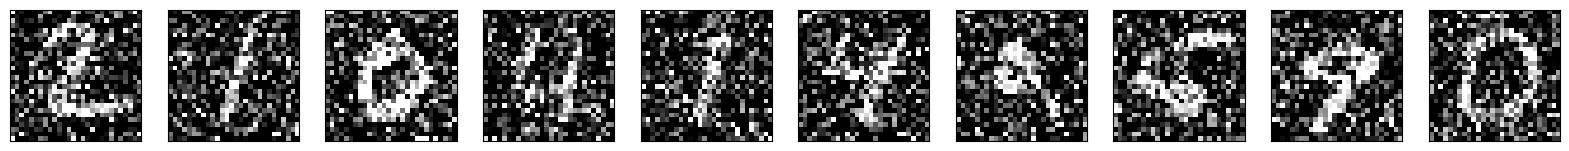

In [26]:
print("BHUVANESHWARI M\n212223230033")
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
input_img = keras.Input(shape=(28, 28, 1))

In [28]:
x=layers.Conv2D(16,(5,5),activation='relu',padding='same')(input_img)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(4,(3,3),activation='relu',padding='same')(x)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(4,(3,3),activation='relu',padding='same')(x)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(8,(7,7),activation='relu',padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x=layers.Conv2D(4,(3,3),activation='relu',padding='same')(encoded)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(4,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(8,(5,5),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(16,(5,5),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(16,(5,5),activation='relu')(x)
x=layers.UpSampling2D((1,1))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [29]:
autoencoder = keras.Model(input_img, decoded)

In [30]:

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 4)         580       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 4)           0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 4)           148 

In [31]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [39]:
autoencoder.fit(x_train_noisy, x_train_scaled,
                epochs=3,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_scaled))

Epoch 1/3
235/235 [==============================] - 179s 762ms/step - loss: 0.1903 - val_loss: 0.1858
Epoch 2/3
235/235 [==============================] - 178s 759ms/step - loss: 0.1846 - val_loss: 0.1810
Epoch 3/3
235/235 [==============================] - 177s 752ms/step - loss: 0.1804 - val_loss: 0.1790


BHUVANESHWARI M
212223230033


<Axes: >

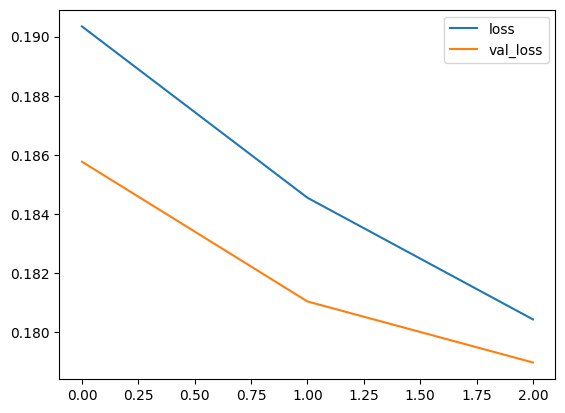

In [40]:
print("BHUVANESHWARI M\n212223230033")
metrics = pd.DataFrame(autoencoder.history.history)
metrics[['loss','val_loss']].plot()


In [41]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 7s 22ms/step


BHUVANESHWARI M
212223230033


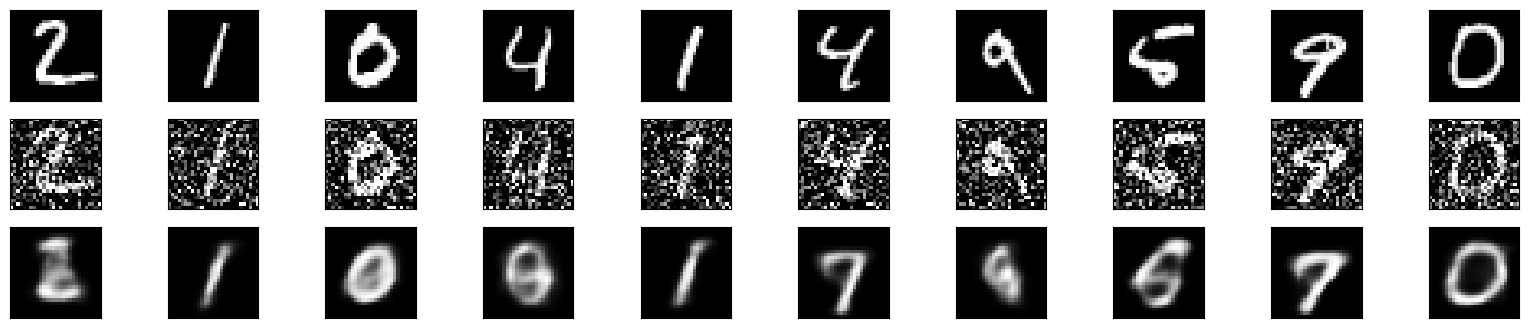

In [42]:
print("BHUVANESHWARI M\n212223230033")
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()